In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/sales data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#명목형 변수: 범주 간에 순서 의미가 없는 자료(혈액형, 지역 등)
categorical_features = ['Channel', 'Region'] 
#연속형 자료: 값이 연속적인 자료(키, 몸무게 등)
continious_features = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [6]:
#pd.get_dummies: one_hot encoding을 수행하는 함수, 문자를 숫자로 바꾸어 주는 방법 
#가변수(dummy variable)로 만들어주는 것, 0(없다)과 1(있다)로만 이루어진 열을 생성
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)#명목형 데이터의 값을 새로운 컬럼으로 부여하여 가변수로서 활용
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()    

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [9]:
#각 데이터별 숫자 범위가 다르므로 연속형 데이터의 모든 특성에 동일하게 중요성 부여하기 위해 스케일링 작업 시도
mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)
df_transformed

array([[0.11294004, 0.13072723, 0.08146416, ..., 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, ..., 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, ..., 0.        , 0.        ,
        1.        ],
       [0.091727  , 0.02622442, 0.02402535, ..., 0.        , 0.        ,
        1.        ],
       [0.02482434, 0.02237109, 0.02702178, ..., 0.        , 0.        ,
        1.        ]])

In [10]:
Sum_of_squared_distances = []
K = range(1, 15) #k값 1부터 15까지 적용해봄
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    #km.inertia_: k_means clustering으로 계산된 sse값
    #clustering 내 오차제곱합(SSE)    

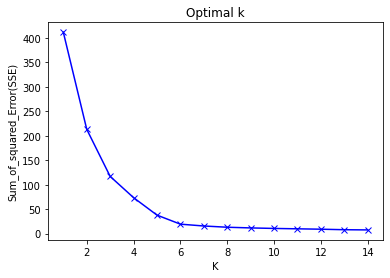

In [11]:
#그래프 그리기
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_Error(SSE)')
plt.title('Optimal k')
plt.show()